## Heart Disease Prediction Using Machine Learning (With GUI) 

### Import Libraries 

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

### Import CSV File

In [3]:
df=pd.read_csv(r'heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Description of Each Attributes in Data Set

age: The person age in years

sex: The person sex (1 = male, 0 = female)

cp: chest pain type:

    0: Typical anginal: chest pain related decrease blood supply to the heart.
    
    1: Atypical anginal: chest pain not related to heart.
    
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    
    3: Asymptomatic: chest pain not showing signs of disease

trestbps: resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern.

chol: cholesterol measurement in mg/dl.
    
    serum = LDL + HDL + .2 * triglycerides
    
    above 200 is cause for concern


fbs: fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement:

    0: Normal
        
    1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
    
    2: For possible heart disease

thalach: maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak:  ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more. ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

slope: the slope of the peak exercise ST segment (Value 0: upsloping, Value 1: flat, Value 2: downsloping)

    0: Upsloping: better heart rate with excercise (uncommon)
    
    1: Flatsloping: minimal change (typical healthy heart)
    
    2: Downsloping: signs of unhealthy heart

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (0-3 = normal; 4-6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

### Data Preprocessing

No of rows

In [5]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

No_of_0's_and_1's

In [6]:
healthy = df[(df['target'] ==0) ].count()[1]
sick = df[(df['target'] ==1) ].count()[1]
print ("Number of People Without Having Heart Disease: "+ str(healthy))
print ("Number Of People With A Chance Of Having Heart Disease: "+ str(sick))

Number of People Without Having Heart Disease: 138
Number Of People With A Chance Of Having Heart Disease: 165


No_of_rows_and_columns

In [7]:
df.shape

(303, 14)

Total size of df(303*14)

In [8]:
df.size

4242

The dataset is balanced having 165 heart disease patients and 138 normal patients

### Statistical Analysis of the whole data

Total_count,mean,standard deviation,minimum value,maximum value etc

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Check for NULL values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Visualization

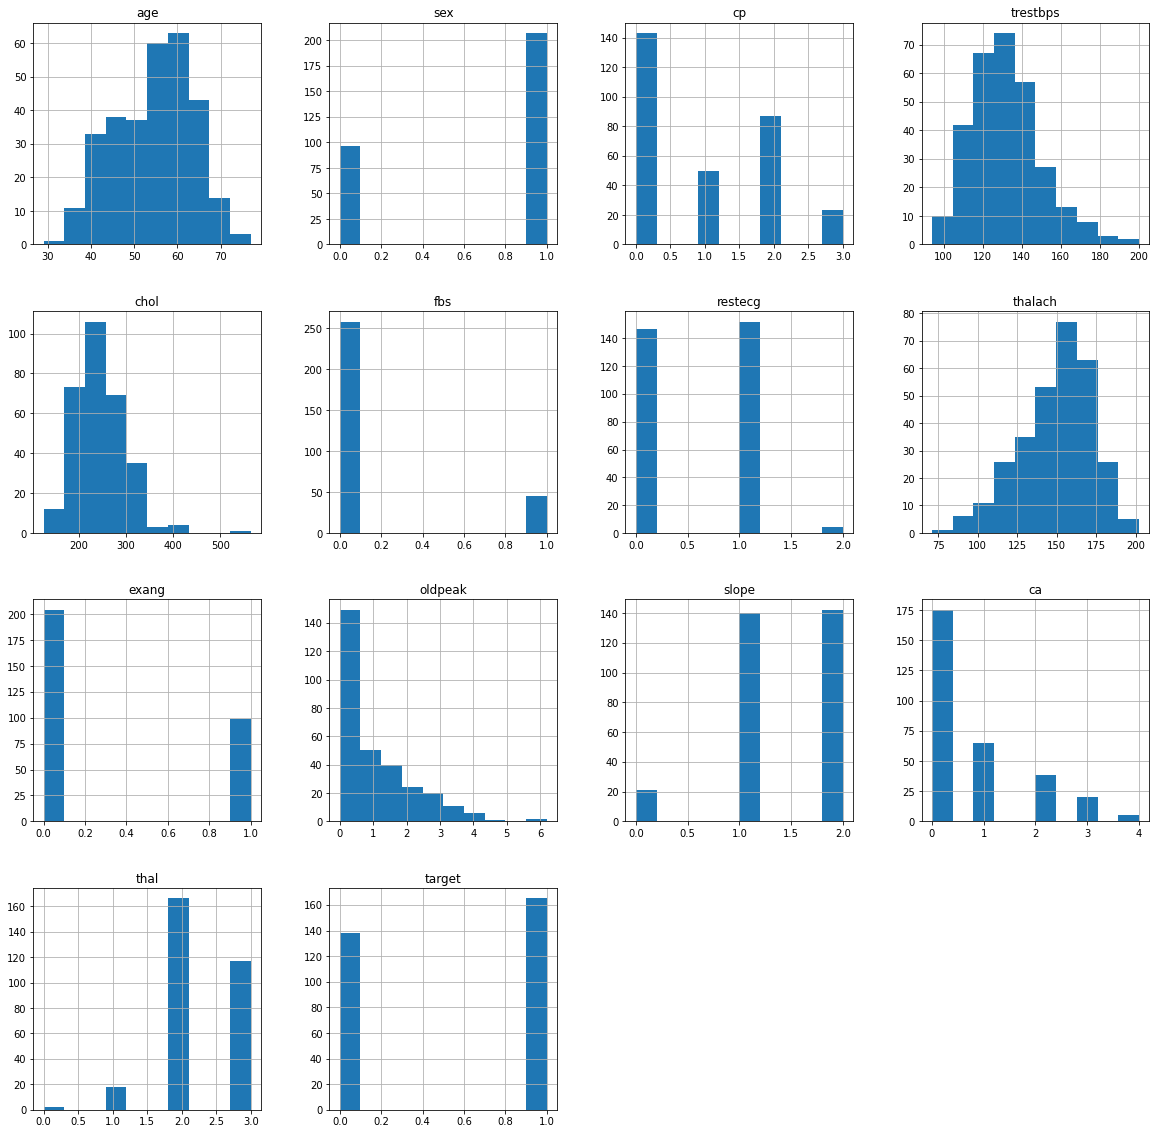

In [11]:
df.hist(figsize=(20,20))
plt.show() 

### Distribution of Heart Disease Patient and Normal Patient (Target Value)

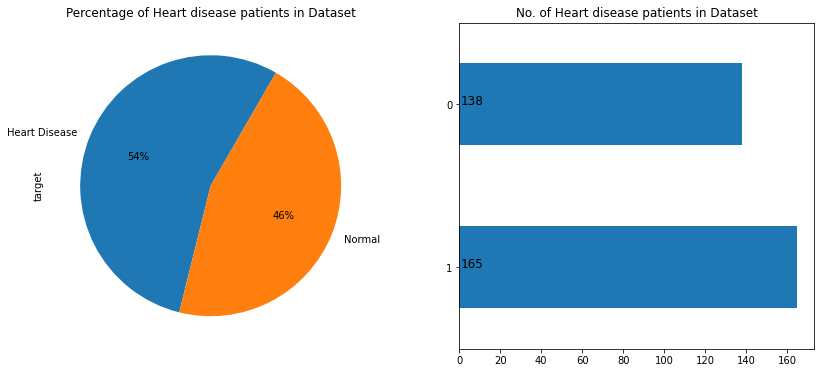

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

#### Checking Gender & Agewise Distribution

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



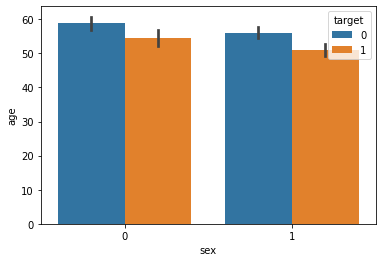

In [13]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

Heart Disease frequency for sex (where 0 is female and 1 is male and "orange" is have heart disease and "blue" is don't have heart disease)

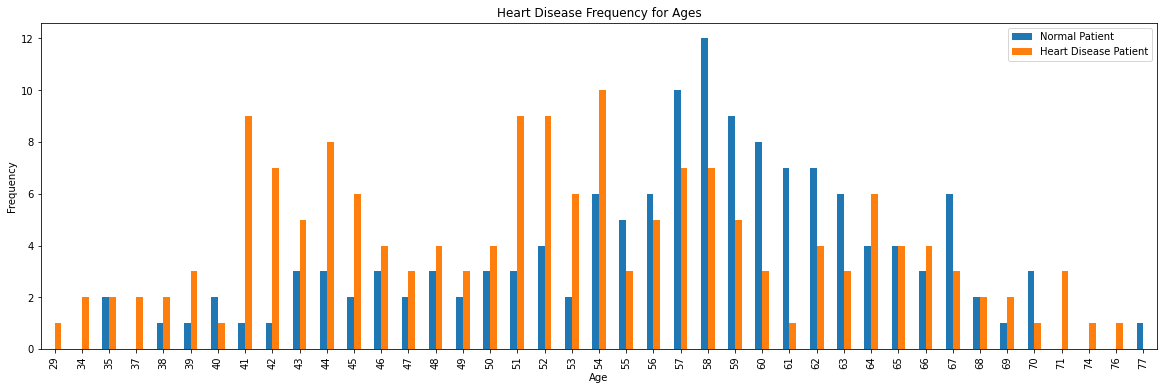

In [14]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Normal Patient", "Heart Disease Patient"])
plt.show()

Text(0.5, 1.0, 'Distribution of Gender')

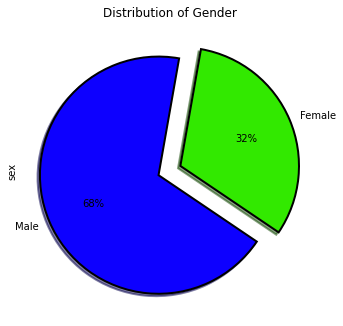

In [15]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 80,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")


As we can see from above plot, in this dataset males percentage(68%) is way too higher than females(32%)

### Age and Gender Distribution of Normal and Heart Disease Patient

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



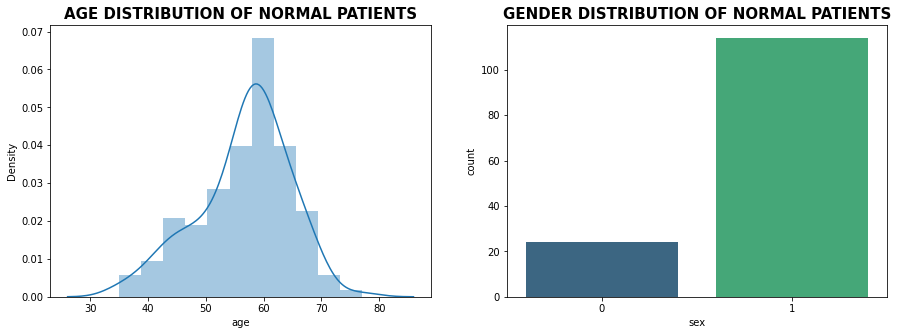

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



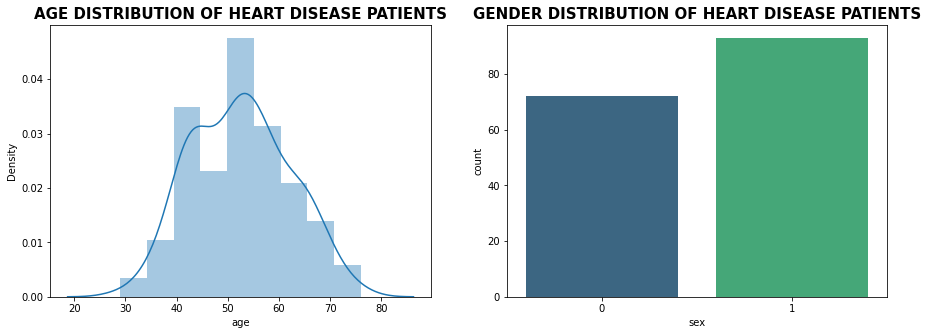

In [16]:

attr_1=df[df['target']==1]

attr_0=df[df['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

### Analysing the chest pain (4 types of chest pain)¶
### [Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic]

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cp', ylabel='target'>

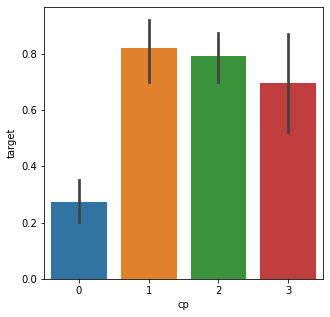

In [17]:
plt.figure(figsize=(5, 5))
sns.barplot(df["cp"],df['target'])

### Distribution of Chest Pain Type

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



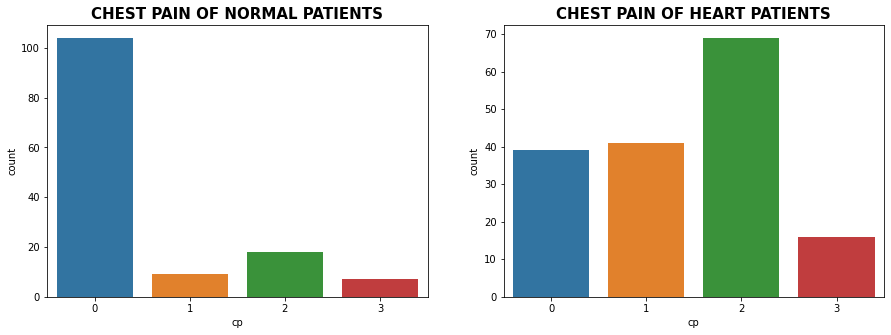

In [18]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['cp'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['cp'])
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [19]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['cp', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df
                   [plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
cp,,
0,75.360000,23.640000
1,6.520000,24.850000
2,13.040000,41.820000
3,5.070000,9.700000


From above we can see from above plot 41.82% of the chest pain type of the Heart Disease Patients is Non-anginal pain. 
And we can see from above plot 75.36% of the chest pain type of the Normal Patients is Typical angina.

### Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='restecg', ylabel='target'>

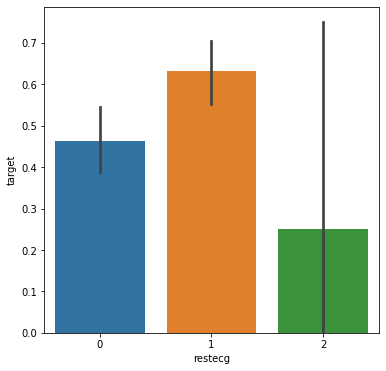

In [20]:
plt.figure(figsize=(6, 6))
sns.barplot(df["restecg"],df['target'])

#### People with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2

### Distribution of Rest ECG

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



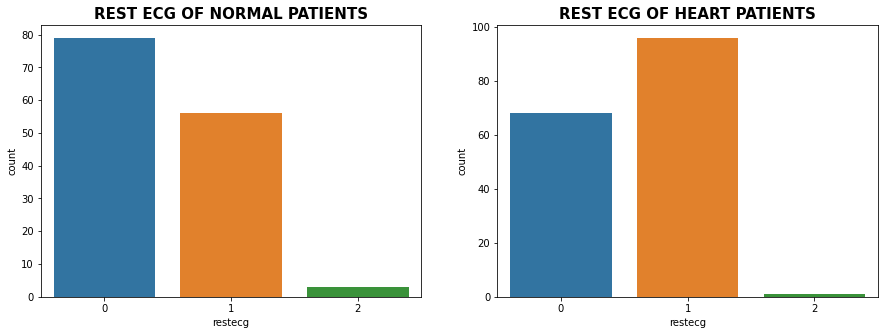

In [21]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['restecg'])
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['restecg'])
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [22]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['restecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
restecg,,
0,57.250000,41.210000
1,40.580000,58.180000
2,2.170000,0.610000


From above we can see from above plot 58.18% of the Resting ECG of the Heart Disease Patients is ST-T wave abnormality.
And we can see from above plot 57.25% of the Resting ECG of the Normal Patients is Normal.

### Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='slope', ylabel='target'>

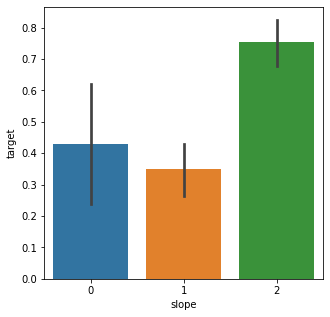

In [23]:
plt.figure(figsize=(5, 5))
sns.barplot(df["slope"],df['target'])

#### Slope '2' causes heart pain much more than Slope '0' and '1'

### Distribution of ST Slope

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



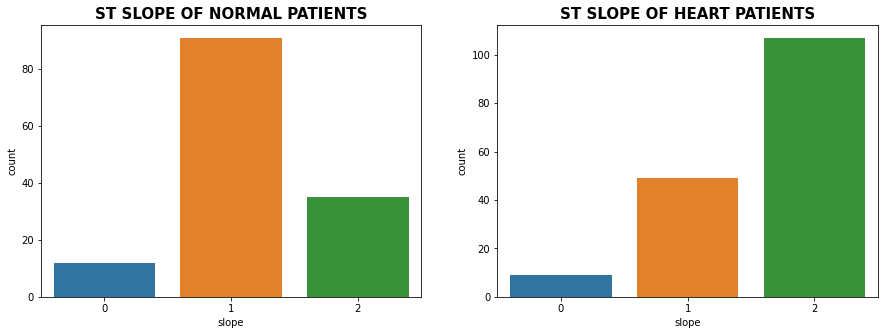

In [24]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0['slope'])
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['slope'])
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [25]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
slope,,
0,8.700000,5.450000
1,65.940000,29.700000
2,25.360000,64.850000


From above plot we have Flatsloping is 65.94% of the normal patients. Also, We we have seen Downsloping is 64.85% of Heart Disease Patient.

### Heart Patient with Maximum Heart Rate Achieved(Thalach) 

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Max Heart Rate of Heart Disease Patient')

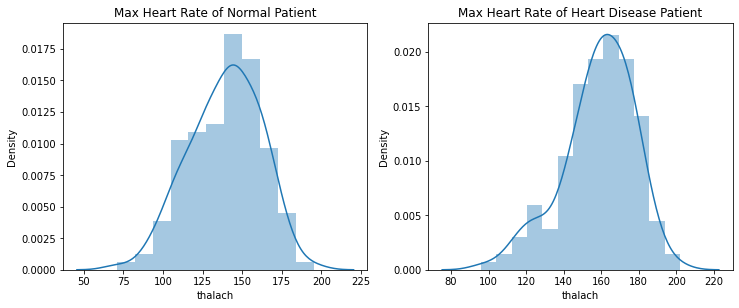

In [26]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].thalach)
plt.title('Max Heart Rate of Normal Patient')

plt.subplot(222)
sns.distplot(df[df['target']==1].thalach)
plt.title('Max Heart Rate of Heart Disease Patient')

### Finding The Correlation

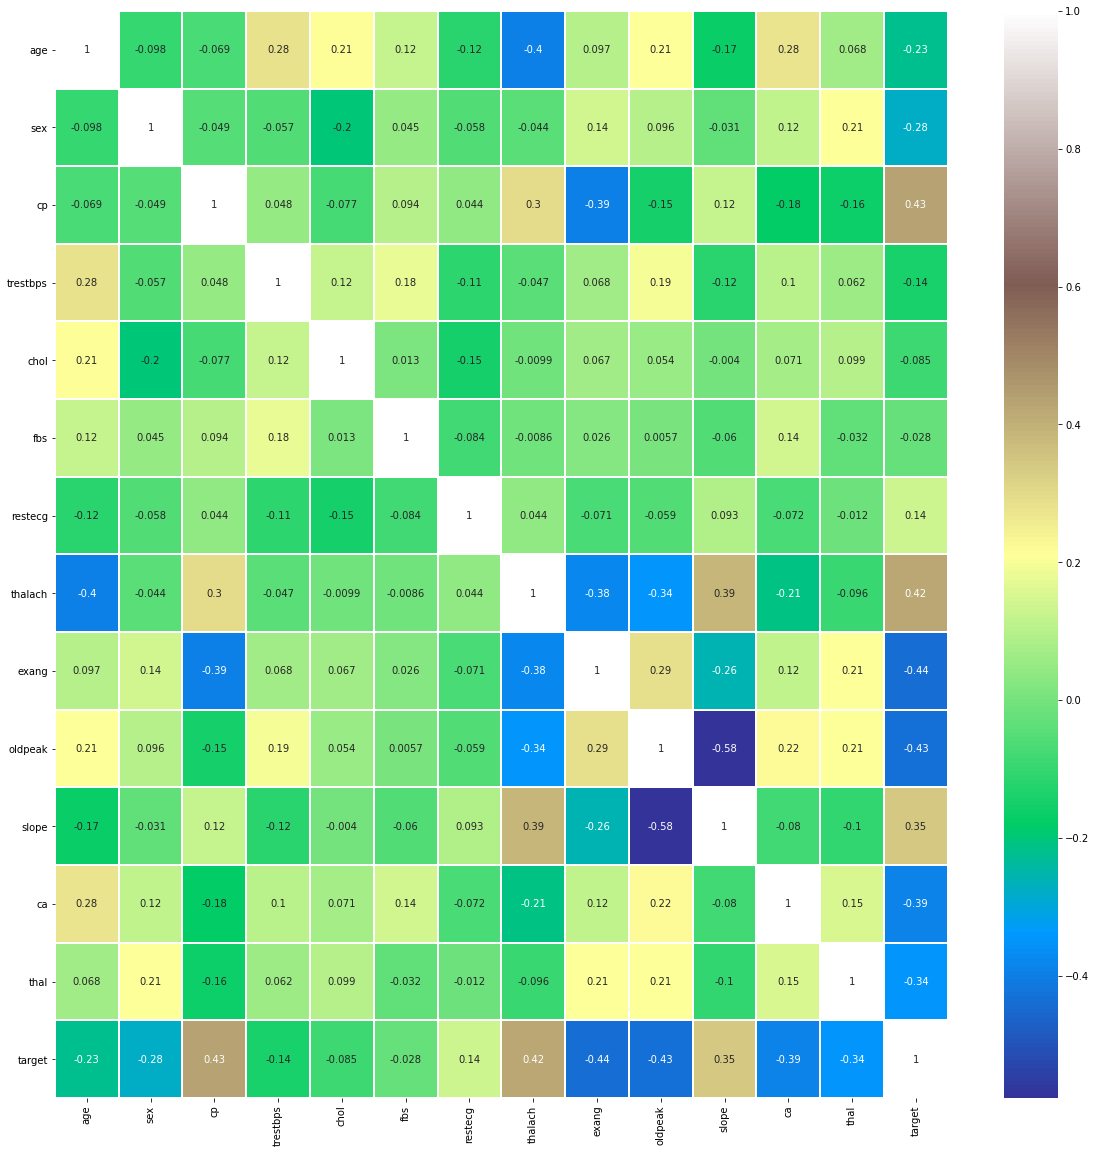

In [27]:
sns.heatmap(df.corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [28]:
numeric_columns=['age','trestbps','chol','thalach','oldpeak']

### Segregating Dataset for finding the Correlation with Target Value

In [29]:
x,y=df.loc[:,:'thal'],df['target']

In [30]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

<AxesSubplot:title={'center':'Correlation Bar Plot'}>

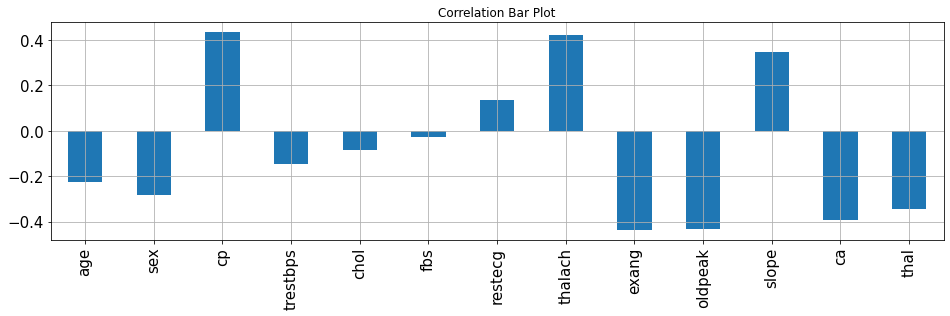

In [32]:
#Correlation with Target Variable

x.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation Bar Plot", fontsize = 15,
        rot = 90, grid = True)

#### fbs and chol are the lowest correlated with the target variable.
#### All other variables have a significant correlation either positively or negatively with the target variable.

In [33]:
y = df['target']
x = df.drop(['target'], axis = 1)

In [34]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [37]:
x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

### Spliting the Dataset


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.30,shuffle=True)

In [40]:
x_train.shape

(212, 13)

In [41]:
x_test.shape

(91, 13)

In [42]:
y_train.size

212

In [43]:
y_test.size

91

In [44]:
#
scores_dict = {}

### Applying Machine Learning Algorithms

### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [46]:
prediction=dt.predict(x_test)

In [47]:
accuracy_dt=accuracy_score(y_test,prediction)*100

In [48]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
accuracy_dt

74.72527472527473

In [49]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.66      0.74        50
           1       0.67      0.85      0.75        41

    accuracy                           0.75        91
   macro avg       0.76      0.76      0.75        91
weighted avg       0.77      0.75      0.75        91



### KNN algorithm

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
prediction_knn=knn.predict(x_test)

In [52]:
accuracy_knn= accuracy_score(y_test,prediction_knn)*100

In [53]:
scores_dict['KNeighborsClassifier'] = accuracy_knn
accuracy_knn

81.31868131868131

In [54]:
print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       0.95      0.70      0.80        50
           1       0.72      0.95      0.82        41

    accuracy                           0.81        91
   macro avg       0.83      0.83      0.81        91
weighted avg       0.85      0.81      0.81        91



In [55]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    prediction_knn=knn.predict(x_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k
    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 4 with score : 0.8571428571428571


In [56]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [57]:
prediction_knn=knn.predict(x_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(y_test,prediction_knn)*100,'%')

accuracy_score score     :  85.71428571428571 %


In [58]:
scores_dict['KNeighborsClassifier'] = accuracy_knn
accuracy_knn

85.71428571428571

In [59]:
print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        50
           1       0.80      0.90      0.85        41

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

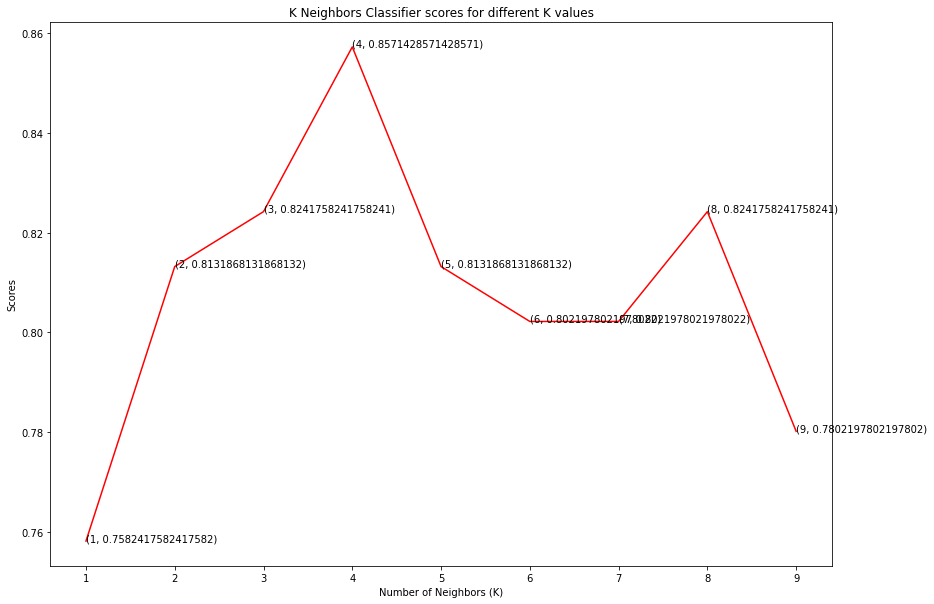

In [60]:
plt.figure(figsize=(14,10))
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))
    
plt.plot([k for k in range(1, 10)], knn_scores, color = 'red')
for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 10)])

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

### Support Vector Machine

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [62]:
prediction_svm=svm.predict(x_test)

In [63]:
accuracy_svm= accuracy_score(y_test,prediction_svm)*100

In [64]:
scores_dict['SupportVectorMachine'] = accuracy_svm
accuracy_svm


80.21978021978022

In [65]:
print(classification_report(y_test,prediction_svm))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80        50
           1       0.72      0.93      0.81        41

    accuracy                           0.80        91
   macro avg       0.82      0.81      0.80        91
weighted avg       0.83      0.80      0.80        91



### Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=10)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [67]:
prediction_rf=rf.predict(x_test)

In [68]:
accuracy_rf= accuracy_score(y_test,prediction_rf)*100

In [69]:
scores_dict['RandomForestClassifier'] = accuracy_rf
accuracy_rf

78.02197802197803

In [70]:
print(classification_report(y_test,prediction_rf))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        50
           1       0.71      0.88      0.78        41

    accuracy                           0.78        91
   macro avg       0.79      0.79      0.78        91
weighted avg       0.80      0.78      0.78        91



In [71]:
from sklearn.metrics import confusion_matrix

cm_dtc = confusion_matrix(y_test,prediction)
cm_knn = confusion_matrix(y_test,prediction_knn)
cm_svm = confusion_matrix(y_test,prediction_svm)
cm_rf = confusion_matrix(y_test,prediction_rf)

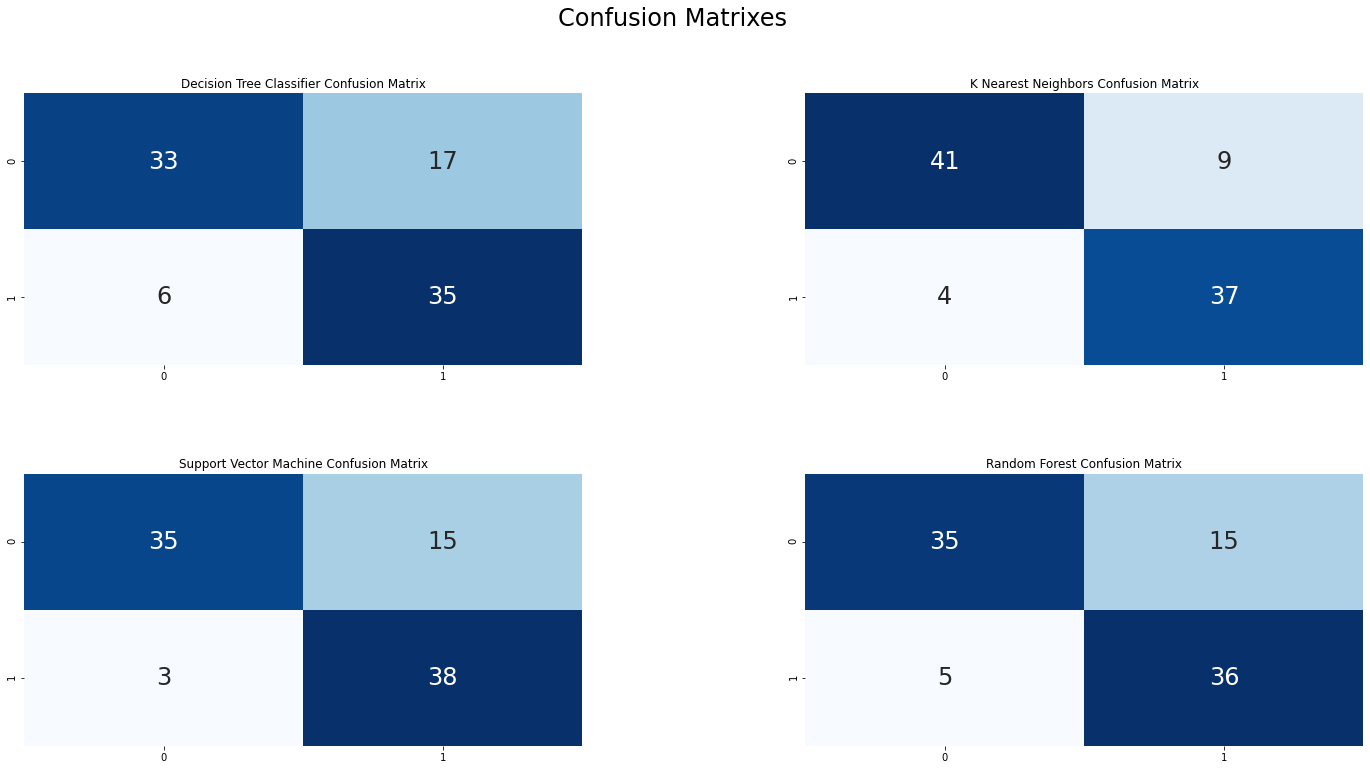

In [72]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()


In [73]:
#Accuracy Of Alogrithms
print('DecisionTree Accuracy :',accuracy_dt)
print('KNN Algorithm Accuracy :',accuracy_knn)
print('SVM Accuracy :',accuracy_svm)
print('RandomForest Accuracy :',accuracy_rf)

DecisionTree Accuracy : 74.72527472527473
KNN Algorithm Accuracy : 85.71428571428571
SVM Accuracy : 80.21978021978022
RandomForest Accuracy : 78.02197802197803


c:\users\mintu\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

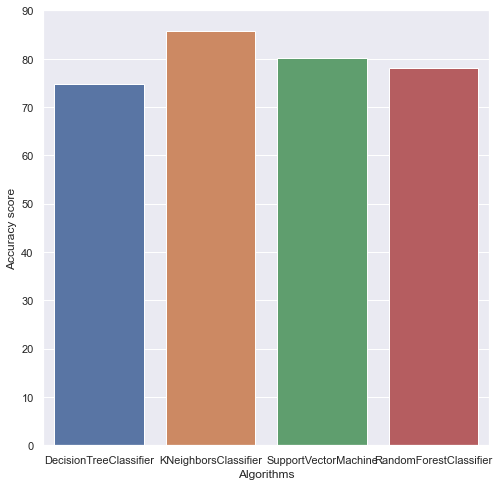

In [74]:
  algo_name = list(scores_dict.keys())
  scoress = list(scores_dict.values())

  sns.set(rc={'figure.figsize':(8,8)})
  plt.xlabel("Algorithms")
  plt.ylabel("Accuracy score")

  sns.barplot(algo_name,scoress)


# Conclusion
#### The project involved analysis of the heart disease patient dataset with proper data processing. Then, 4 models were trained and tested with maximum scores as follows:

#### Decision Tree Classifier : 74.72%

#### K-Nearest Neighbors Algorithm : 85.71%

#### Support Vector Machine : 80.21%

#### Random Forest Classifier : 78.02%

## K-Nearest Neighbors Algorithm scored the best score of 85.71% when K=4.


In [75]:
import tkinter
def takeInput():
    inputValues = []

    
    age1 = int(age.get())
    trestbps1 = int(rbp.get())
    chol1 = int(serumChol.get())
    thalach1 = int(thalach.get())
    oldpeak1 = float(oldpeak.get())
    
    inputValues.append(age1)
    inputValues.append(sex.get())
    inputValues.append(chestPain.get())
    inputValues.append(trestbps1)
    inputValues.append(chol1)
    inputValues.append(FBS.get())
    inputValues.append(ECG.get())
    inputValues.append(thalach1)
    inputValues.append(trestbps1)
    inputValues.append(oldpeak1)
    inputValues.append(slope.get())
    inputValues.append(ca.get())
    inputValues.append(thal.get()) 
    
    print(inputValues)


    final_Result = knn_classifier.predict([inputValues])

    print(final_Result)
    print("\n")
    

    substituteWindow = tkinter.Tk()
    substituteWindow.geometry('480x360-8-200')
    substituteWindow.title("RESULT PREDICTION")
    
    substituteWindow.columnconfigure(0, weight=2)
    substituteWindow.columnconfigure(1, weight=1)
    substituteWindow.columnconfigure(2, weight=2)
    substituteWindow.columnconfigure(3, weight=2)
    substituteWindow.rowconfigure(0, weight=1)
    substituteWindow.rowconfigure(1, weight=10)
    substituteWindow.rowconfigure(2, weight=10)
    substituteWindow.rowconfigure(3, weight=1)
    substituteWindow.rowconfigure(4, weight=1)
    substituteWindow.rowconfigure(5, weight=1)
    
    if final_Result[0] == 1:
        label1 = tkinter.Label(substituteWindow, text="HEART DISEASE DETECTED", font=('Impact', 20))
        label1.grid(row=1, column=1, columnspan=6)

    else: 
        label1 = tkinter.Label(substituteWindow, text="NO DETECTION OF HEART DISEASES", font=('Impact', 20))
        label1.grid(row=1, column=1, columnspan=6)     
        
    substituteWindow.mainloop()
    





knn_classifier = KNeighborsClassifier(n_neighbors = 4)
knn_classifier.fit(x_train, y_train)

rfc=RandomForestClassifier(random_state=1)
rfc.fit(x_train, y_train)

svm=SVC(random_state=1)
svm.fit(x_train, y_train)
 
    
mainWindow = tkinter.Tk()
mainWindow.geometry('640x480-8-200')
mainWindow['padx']=20
mainWindow.title("HEART DISEASE PREDICTION")

mainWindow.columnconfigure(0, weight=2)
mainWindow.columnconfigure(1, weight=1)
mainWindow.columnconfigure(2, weight=2)
mainWindow.columnconfigure(3, weight=2)
mainWindow.rowconfigure(0, weight=0)
mainWindow.rowconfigure(1, weight=0)
mainWindow.rowconfigure(2, weight=1)
mainWindow.rowconfigure(3, weight=1)
mainWindow.rowconfigure(4, weight=1)
mainWindow.rowconfigure(5, weight=1)
mainWindow.rowconfigure(6, weight=1)
mainWindow.rowconfigure(7, weight=1)
mainWindow.rowconfigure(8, weight=10)


label1 = tkinter.Label(mainWindow, text="HEART DISEASE PREDICTION MODEL", font=('Impact', -35))
label1.grid(row=0, column=0, columnspan=6)

label2 = tkinter.Label(mainWindow, text="Enter the details carefully", font=('Impact', -25) )
label2.grid(row=1, column=0, columnspan=6)



ageFrame = tkinter.LabelFrame(mainWindow, text="Age(yrs)")
ageFrame.grid(row=2, column=0)
ageFrame.config(font=("Courier", -15))
age= tkinter.Entry(ageFrame)
age.grid(row=2, column=2, sticky='nw')

sexFrame = tkinter.LabelFrame(mainWindow, text="Sex")
sexFrame.grid(row=2, column=1)
sexFrame.config(font=("Courier", -15))
sex= tkinter.Entry(sexFrame)
sex.grid(row=2, column=2, sticky='nw')

chestPainFrame = tkinter.LabelFrame(mainWindow, text="CP (0,1,2,3)")
chestPainFrame.grid(row=2, column=2)
chestPainFrame.config(font=("Courier", -15))
chestPain= tkinter.Entry(chestPainFrame)
chestPain.grid(row=2, column=2, sticky='nw')


rbpFrame = tkinter.LabelFrame(mainWindow, text="RBP (94-200)")
rbpFrame.grid(row=3, column=0)
rbpFrame.config(font=("Courier", -15))
rbp= tkinter.Entry(rbpFrame)
rbp.grid(row=2, column=2, sticky='nw')

serumCholFrame = tkinter.LabelFrame(mainWindow, text="Serum Chol")
serumCholFrame.grid(row=3, column=1)
serumCholFrame.config(font=("Courier", -15))
serumChol = tkinter.Entry(serumCholFrame)
serumChol.grid(row=2, column=2, sticky='n')

FBSFrame = tkinter.LabelFrame(mainWindow, text="Fasting BP(0,1)")
FBSFrame.grid(row=3, column=2)
FBSFrame.config(font=("Courier", -15))
FBS= tkinter.Entry(FBSFrame)
FBS.grid(row=2, column=2, sticky='nw')

ECGFrame = tkinter.LabelFrame(mainWindow, text="ECG (0,1,2)")
ECGFrame.grid(row=4, column=0)
ECGFrame.config(font=("Courier", -15))
ECG = tkinter.Entry(ECGFrame)
ECG.grid(row=2, column=2, sticky='nw')


thalachFrame = tkinter.LabelFrame(mainWindow, text="thalach(71-202)")
thalachFrame.grid(row=4, column=1)
thalachFrame.config(font=("Courier", -15))
thalach = tkinter.Entry(thalachFrame)
thalach.grid(row=2, column=2, sticky='nw')

exangFrame = tkinter.LabelFrame(mainWindow, text="exAngina(0/1)")
exangFrame.grid(row=4, column=2)
exangFrame.config(font=("Courier", -15))
exang = tkinter.Entry(exangFrame)
exang.grid(row=2, column=2, sticky='nw')


oldpeakFrame = tkinter.LabelFrame(mainWindow, text="Old Peak(0-6.2)")
oldpeakFrame.grid(row=5, column=0)
oldpeakFrame.config(font=("Courier", -15))
oldpeak = tkinter.Entry(oldpeakFrame)
oldpeak.grid(row=2, column=2, sticky='nw')
  
slopeFrame = tkinter.LabelFrame(mainWindow, text="Slope(0,1,2)")
slopeFrame.grid(row=5, column=1)
slopeFrame.config(font=("Courier", -15))
slope = tkinter.Entry(slopeFrame)
slope.grid(row=2, column=2, sticky='nw')

caFrame = tkinter.LabelFrame(mainWindow, text=" CA (0,1,2,3,4)")
caFrame.grid(row=5, column=2)
caFrame.config(font=("Courier", -15))
ca = tkinter.Entry(caFrame)
ca.grid(row=2, column=2, sticky='nw')


thalFrame = tkinter.LabelFrame(mainWindow, text=" THAL(0,1,2,3)")
thalFrame.grid(row=6, column=1)
thalFrame.config(font=("Courier", -15))
thal = tkinter.Entry(thalFrame)
thal.grid(row=2, column=2, sticky='nw')


analyseButton = tkinter.Button(mainWindow, text="PREDICT", font=('Impact', 15), bg = 'silver', command=takeInput)
analyseButton.grid(row=8, column=0, columnspan=10)



mainWindow.mainloop()